# Spherical Coordinates

This notebook demonstrates how we use spherical coordinates to parameterize the rotational degrees of freedom (DoF) in our 7 DoF camera setup.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from diffdrr.drr import DRR

In [ ]:
drr = DRR(
    volume=np.zeros([512, 512, 133]),
    spacing=[1, 1, 1],
    height=5,
    delx=0.75,
).to("cuda" if torch.cuda.is_available() else "cpu")

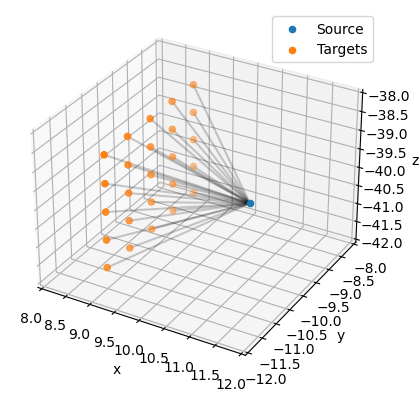

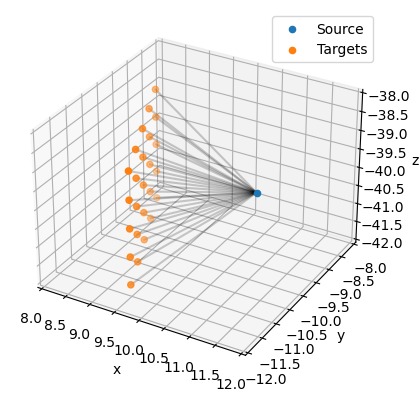

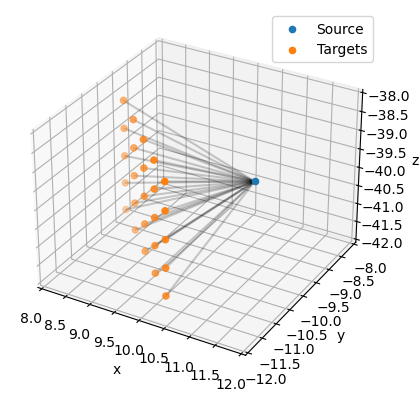

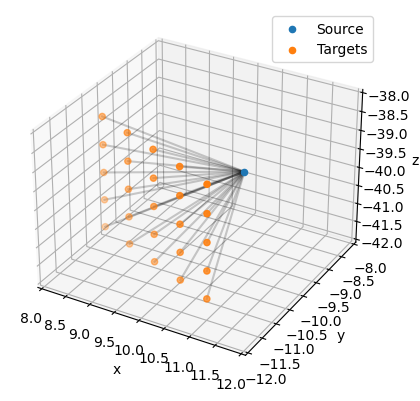

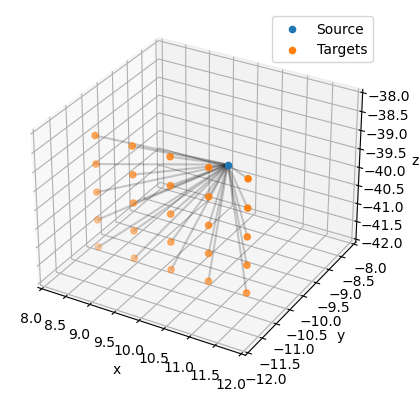

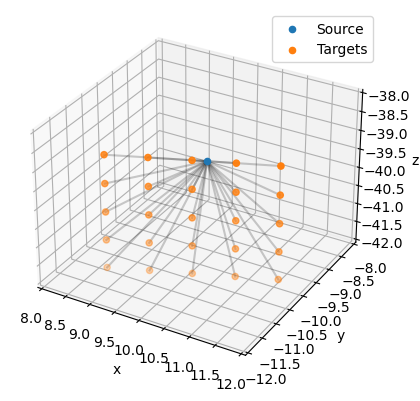

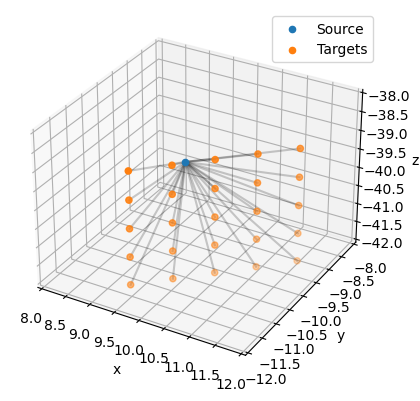

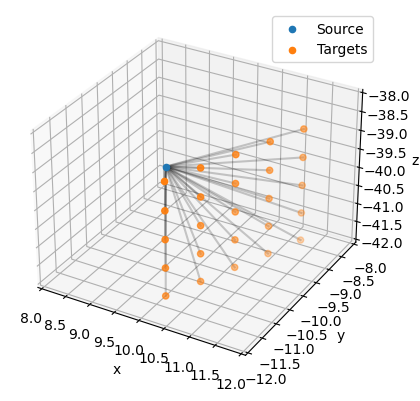

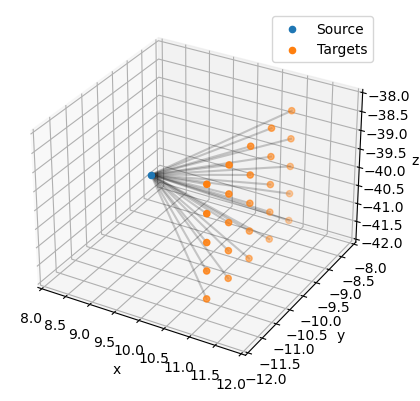

In [ ]:
for i in range(9):
    _ = drr(
        sdr    =  1,
        theta  =  (i / 8) * torch.pi,
        phi    =  (0 / 8) * torch.pi,
        gamma  =  (0 / 8) * torch.pi,
        bx     =  10,
        by     = -10,
        bz     = -40,
    )
    source, rays = drr.detector.make_xrays(drr.sdr, drr.rotations, drr.translations)
    source_ = source.detach().cpu()
    rays_ = rays.permute(2, 0, 1).detach().cpu()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(source_[0, 0, 0]  , source_[0, 0, 1]  , source_[0, 0, 2]  , label="Source")
    ax.scatter(rays_[0].flatten(), rays_[1].flatten(), rays_[2].flatten(), label="Targets")

    xs, ys, zs = rays_.reshape(3, -1)
    for x, y, z in zip(xs, ys, zs):
        ax.plot([source_[0, 0, 0], x], [source_[0, 0, 1], y], [source_[0, 0, 2], z], "k", alpha=0.2)

    ax.set(xlabel="x", ylabel="y", zlabel="z")
    ax.set(xlim=[8,12], ylim=[-12,-8], zlim=[-42,-38])
    plt.legend()
    plt.show()

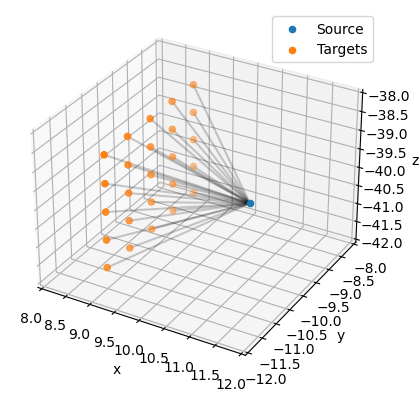

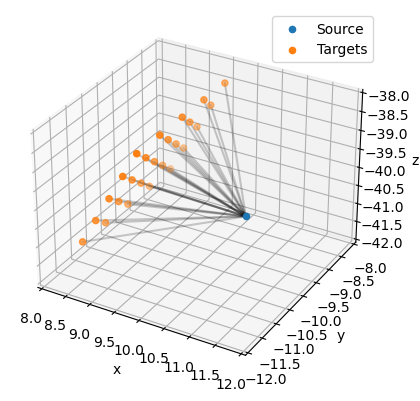

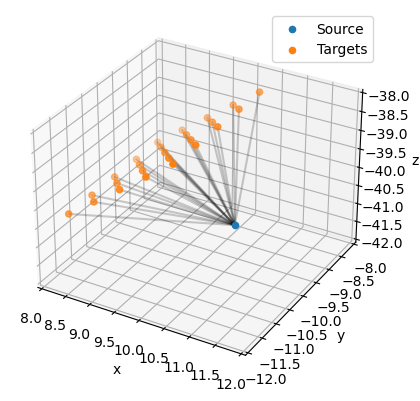

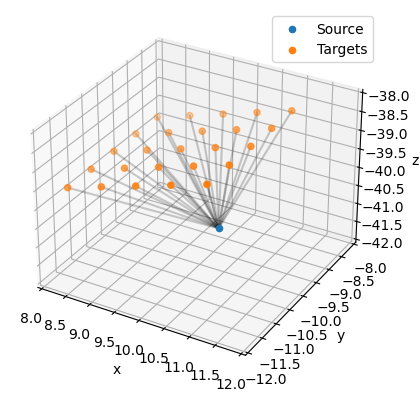

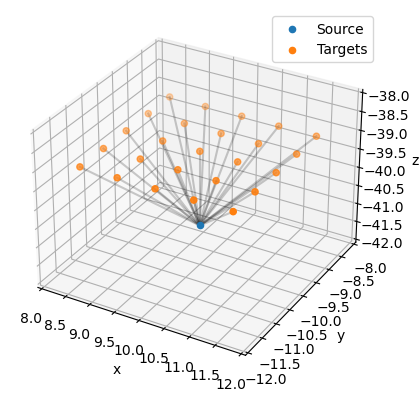

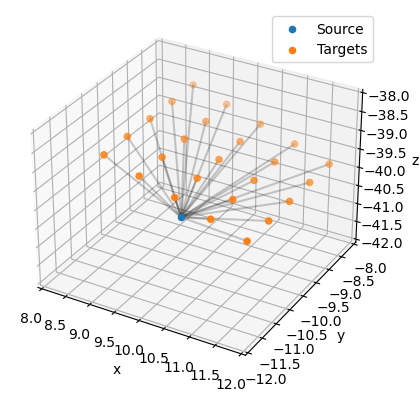

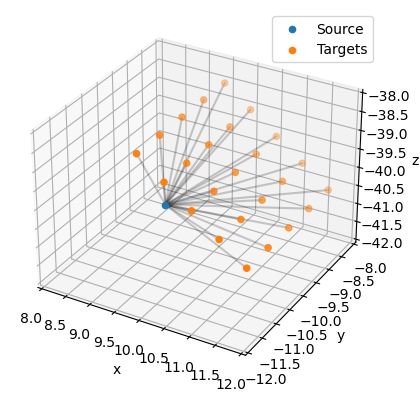

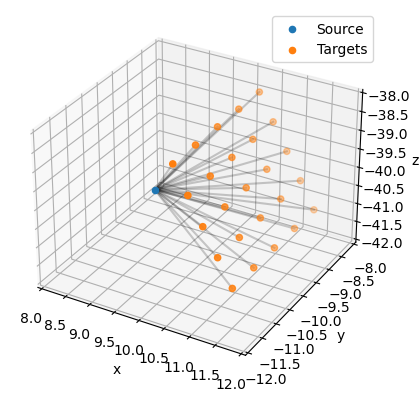

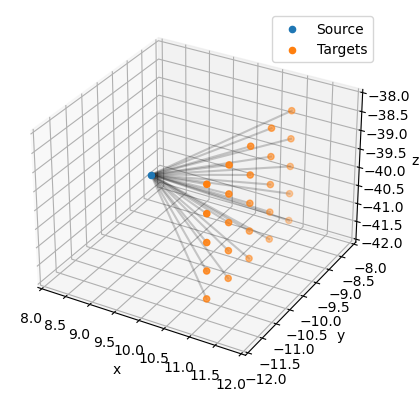

In [ ]:
for i in range(9):
    _ = drr(
        sdr    =  1,
        theta  =  (0 / 8) * torch.pi,
        phi    =  (i / 8) * torch.pi,
        gamma  =  (0 / 8) * torch.pi,
        bx     =  10,
        by     = -10,
        bz     = -40,
    )
    source, rays = drr.detector.make_xrays(drr.sdr, drr.rotations, drr.translations)
    source_ = source.detach().cpu()
    rays_ = rays.permute(2, 0, 1).detach().cpu()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(source_[0, 0, 0]  , source_[0, 0, 1]  , source_[0, 0, 2]  , label="Source")
    ax.scatter(rays_[0].flatten(), rays_[1].flatten(), rays_[2].flatten(), label="Targets")

    xs, ys, zs = rays_.reshape(3, -1)
    for x, y, z in zip(xs, ys, zs):
        ax.plot([source_[0, 0, 0], x], [source_[0, 0, 1], y], [source_[0, 0, 2], z], "k", alpha=0.2)

    ax.set(xlabel="x", ylabel="y", zlabel="z")
    ax.set(xlim=[8,12], ylim=[-12,-8], zlim=[-42,-38])
    plt.legend()
    plt.show()

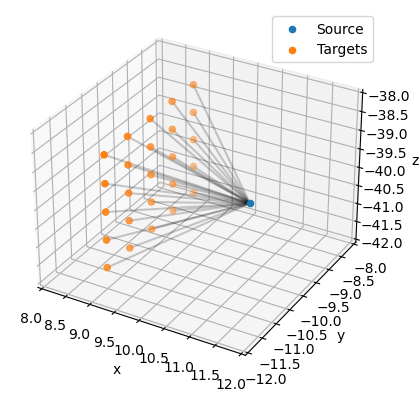

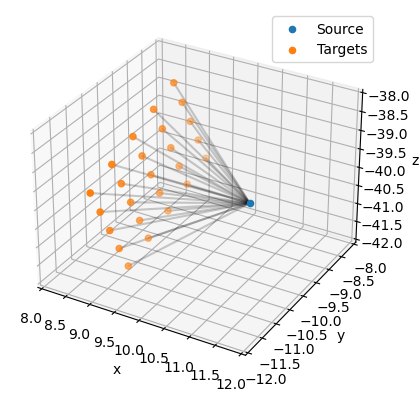

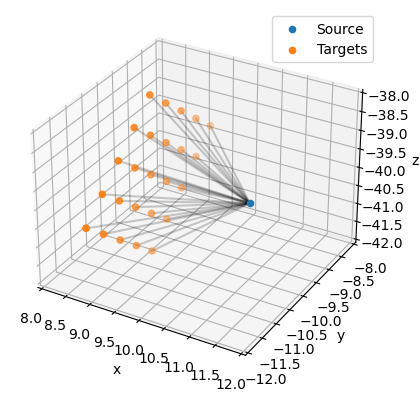

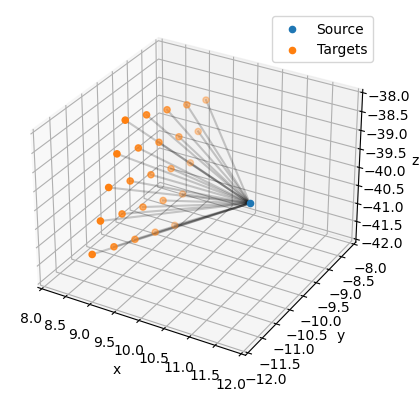

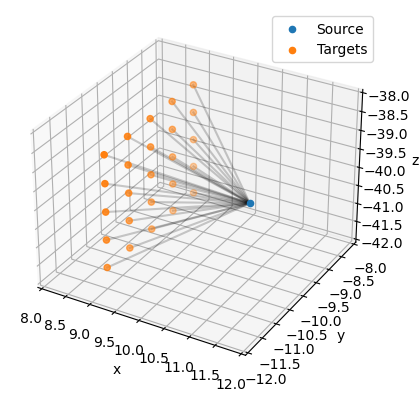

In [ ]:
for i in range(5):
    _ = drr(
        sdr    =  1,
        theta  =  (0 / 8) * torch.pi,
        phi    =  (0 / 8) * torch.pi,
        gamma  =  (i / 8) * torch.pi,
        bx     =  10,
        by     = -10,
        bz     = -40,
    )
    source, rays = drr.detector.make_xrays(drr.sdr, drr.rotations, drr.translations)
    source_ = source.detach().cpu()
    rays_ = rays.permute(2, 0, 1).detach().cpu()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(source_[0, 0, 0]  , source_[0, 0, 1]  , source_[0, 0, 2]  , label="Source")
    ax.scatter(rays_[0].flatten(), rays_[1].flatten(), rays_[2].flatten(), label="Targets")

    xs, ys, zs = rays_.reshape(3, -1)
    for x, y, z in zip(xs, ys, zs):
        ax.plot([source_[0, 0, 0], x], [source_[0, 0, 1], y], [source_[0, 0, 2], z], "k", alpha=0.2)

    ax.set(xlabel="x", ylabel="y", zlabel="z")
    ax.set(xlim=[8,12], ylim=[-12,-8], zlim=[-42,-38])
    plt.legend()
    plt.show()